In [1]:
'''Linear algebra'''
import math
import random
import itertools
import pandas as pd
from pandas import Series, DataFrame 
import numpy as np
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

'''Data visualisation'''
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns


#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 
import scrapbook as sb

# Loading dataset

In [2]:
dataset = pd.read_csv('../raw_data/ytrain_raw.csv')

/Users/nhuyghe/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,5,11,20,49,52,54,55,56,64,70,71,94,95,101,102,114,129,131,132,133,138,139,152,157,163,174,180,184,193,196,201,207,208,219,220,228,241,245,250,256,258,264,265,269,270,271,272,273) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Cleaning of data

In [46]:
dataset_cleaned = dataset[:]
dataset_cleaned.sort_values(by='timestamp').head()

,timestamp,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,S62-T3,S14-T3,S8-T1,S8-T3,S34-T3,S6-T2,S29-T3,S64-T1,S11-T1,S76-T3,S59-T1,S58-T1,S58-T3,S21-T3,S96-T3,S30-T1,S77-T1,S35-T3,S71-T3,S89-T1,S51-T3,S51-T1,S38-T3,S79-T1,S79-T3,S33-T3,S33-T1,S50-T3,S1-T3,S49-T1,S60-T3,S48-T2,S98-T3,S3-T3,S3-T1,S70-T3,S17-T1,S78-T1,S80-T3,S66-T3,S27-T3,S27-T1,S92-T3,S12-T2,S7-T3,S19-T3,S23-T1,S86-T1,S67-T3,S25-T3,S10-T3,S10-T1,S20-T3,S31-T1,S41-T3,S29-T1,S32-T1,S26-T1,S53-T1,S4-T3,S82-T1,S82-T3,S91-T1,S91-T3,S30-T3,S24-T1,S99-T1,S99-T3,S88-T1,S74-T3,S39-T3,S45-T2,S38-T1,S42-T2,S42-T1,S1-T2,S84-T1,S46-T1,S68-T1,S68-T3,S60-T1,S48-T3,S13-T3,S80-T2,S66-T1,S92-T1,S5-T3,S12-T3,S12-T1,S69-T3,S2-T3,S22-T1,S65-T1,S67-T1,S6-T3,S31-T3,S9-T1,S64-T2,S76-T1,S26-T3,S72-T1,S37-T1,S37-T3,S15-T1,S82-T2,S35-T1,S88-T2,S18-T3,S18-T1,S18-T2,S39-T1,S45-T3,S95-T1,S49-T3,S49-T2,S46-T3,S98-T1,S13-T1,S83-T1,S66-T2,S63-T3,S22-T3,S22-T2,S47-T1,S94-T1,S64-T3,S11-T3,S76-T2,S59-T3,S57-T1,S24-T3,S45-T1,S38-T2,S50-T1,S84-T3,S3-T2,S70-T1,S97-T1,S93-T3,S63-T1,S69-T1,S69-T2,S23-T3,S52-T2,S52-T1,S86-T2,S34-T1,S87-T3,S75-T1,S75-T3,S53-T2,S53-T3,S4-T1,S59-T2,S72-T3,S58-T2,S15-T2,S89-T2,S89-T3,S95-T3,S1-T1,S81-T1,S93-T2,S56-T1,S47-T3,S67-T2,S28-T3,S34-T2,S6-T1,S9-T3,S87-T1,S32-T3,S26-T2,S15-T3,S57-T3,S77-T3,S36-T3,S42-T3,S46-T2,S97-T3,S17-T3,S93-T1,S83-T3,S85-T2,S62-T1,S20-T1,S41-T1,S74-T1,S70-T2,S5-T1,S52-T3,S65-T3,S96-T1,S71-T1,S84-T2,S17-T2,S86-T3,S14-T2,S14-T1,S8-T2,S29-T2,S72-T2,S91-T2,S74-T2,S33-T2,S81-T3,S48-T1,S78-T3,S80-T1,S85-T1,S57-T2,S77-T2,S88-T3,S36-T1,S50-T2,S81-T2,S78-T2,S63-T2,S87-T2,S30-T2,S24-T2,S83-T2,S10-T2,S4-T2,S71-T2,S36-T2,S79-T2,S16-T2,S94-T2,S9-T2,S21-T1,S92-T2,S11-T2,S51-T2,S60-T2,S19-T2,S62-T2,S31-T2,S96-T2,S27-T2,S23-T2,S28-T2,S37-T2,S39-T2,S68-T2,S56-T2,S41-T2,S35-T2,S7-T2,S75-T2,S20-T2,S95-T2,S5-T2,S2-T2,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
0,2019-11-25T00:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,Down,Down,Offline,Offline,Offline,Offline,Available,Available,Offline,Passive,Available,Available,Available,Passive,Available,Passive,Available,Passive,Available,Available,Charging,Available,Available,Available,Passive,Available,Available,Available,Available,Offline,Passive,Available,Available,Passive,Available,Available,Available,Available,Passive,Available,Available,Charging,Available,Charging,Down,Available,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Available,Offline,Offline,Down,Available,Available,Available,Available,Available,Available,Available,Down,Down,Available,Available,Available,Available,Available,Available,Charging,Available,Available,Offline,Offline,Offline,Available,Available,Available,Available,Available,Passive,Charging,Charging,Charging,Available,Down,Down,Offline,Offline,Offline,Offline,Available,Available,Available,Offline,Available,Available,Available,Available,Available,Passive,Charging,Available,Passive,Down,Available,Down,Available,Offline,Offline,Offline,Passive,Charging,Charging,Charging,Charging,Down,Down,Down,Offline,Available,Offline,Available,Passive,Charging,Available,Available,Available,Available,Available,Passive,Available,Available,Available,Available,Available,Available,Offline,Offline,Offline,Offline,Offline,Available,Offline,Offline,Down,Down,Passive,Passive,Available,Available,Available,Charging,Available,Available,Available,Available,Available,Down,Down,Offline,Available,Offline,Offline,Offline,Available,Offline,Offline,Available,Available,Available,Available,Available,Offline,Available,Available,Available,Available,Down,Down,Offline,Offline,Available,Passive,Charging,Offline,Offline,Available,Available,Available,Available,Offline,Down,Down,Offline,Available,Charging,Available,Passive,Available,Charging,Available,Charging,Passive,Down,Charging,Passive,Available,Available,Passive,Charging,Charging,Charging,Available,Charging,Available,Available,Offline,Available,Charging,Charging,Available,Offline,Offline,Offlin

In [47]:
dataset_cleaned = dataset_cleaned.fillna('Offline')
dataset_cleaned['timestamp'] = pd.to_datetime(dataset_cleaned['timestamp'])
dataset_cleaned = dataset_cleaned.set_index('timestamp')
dataset_cleaned.head()

,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,S62-T3,S14-T3,S8-T1,S8-T3,S34-T3,S6-T2,S29-T3,S64-T1,S11-T1,S76-T3,S59-T1,S58-T1,S58-T3,S21-T3,S96-T3,S30-T1,S77-T1,S35-T3,S71-T3,S89-T1,S51-T3,S51-T1,S38-T3,S79-T1,S79-T3,S33-T3,S33-T1,S50-T3,S1-T3,S49-T1,S60-T3,S48-T2,S98-T3,S3-T3,S3-T1,S70-T3,S17-T1,S78-T1,S80-T3,S66-T3,S27-T3,S27-T1,S92-T3,S12-T2,S7-T3,S19-T3,S23-T1,S86-T1,S67-T3,S25-T3,S10-T3,S10-T1,S20-T3,S31-T1,S41-T3,S29-T1,S32-T1,S26-T1,S53-T1,S4-T3,S82-T1,S82-T3,S91-T1,S91-T3,S30-T3,S24-T1,S99-T1,S99-T3,S88-T1,S74-T3,S39-T3,S45-T2,S38-T1,S42-T2,S42-T1,S1-T2,S84-T1,S46-T1,S68-T1,S68-T3,S60-T1,S48-T3,S13-T3,S80-T2,S66-T1,S92-T1,S5-T3,S12-T3,S12-T1,S69-T3,S2-T3,S22-T1,S65-T1,S67-T1,S6-T3,S31-T3,S9-T1,S64-T2,S76-T1,S26-T3,S72-T1,S37-T1,S37-T3,S15-T1,S82-T2,S35-T1,S88-T2,S18-T3,S18-T1,S18-T2,S39-T1,S45-T3,S95-T1,S49-T3,S49-T2,S46-T3,S98-T1,S13-T1,S83-T1,S66-T2,S63-T3,S22-T3,S22-T2,S47-T1,S94-T1,S64-T3,S11-T3,S76-T2,S59-T3,S57-T1,S24-T3,S45-T1,S38-T2,S50-T1,S84-T3,S3-T2,S70-T1,S97-T1,S93-T3,S63-T1,S69-T1,S69-T2,S23-T3,S52-T2,S52-T1,S86-T2,S34-T1,S87-T3,S75-T1,S75-T3,S53-T2,S53-T3,S4-T1,S59-T2,S72-T3,S58-T2,S15-T2,S89-T2,S89-T3,S95-T3,S1-T1,S81-T1,S93-T2,S56-T1,S47-T3,S67-T2,S28-T3,S34-T2,S6-T1,S9-T3,S87-T1,S32-T3,S26-T2,S15-T3,S57-T3,S77-T3,S36-T3,S42-T3,S46-T2,S97-T3,S17-T3,S93-T1,S83-T3,S85-T2,S62-T1,S20-T1,S41-T1,S74-T1,S70-T2,S5-T1,S52-T3,S65-T3,S96-T1,S71-T1,S84-T2,S17-T2,S86-T3,S14-T2,S14-T1,S8-T2,S29-T2,S72-T2,S91-T2,S74-T2,S33-T2,S81-T3,S48-T1,S78-T3,S80-T1,S85-T1,S57-T2,S77-T2,S88-T3,S36-T1,S50-T2,S81-T2,S78-T2,S63-T2,S87-T2,S30-T2,S24-T2,S83-T2,S10-T2,S4-T2,S71-T2,S36-T2,S79-T2,S16-T2,S94-T2,S9-T2,S21-T1,S92-T2,S11-T2,S51-T2,S60-T2,S19-T2,S62-T2,S31-T2,S96-T2,S27-T2,S23-T2,S28-T2,S37-T2,S39-T2,S68-T2,S56-T2,S41-T2,S35-T2,S7-T2,S75-T2,S20-T2,S95-T2,S5-T2,S2-T2,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-25 00:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,Down,Down,Offline,Offline,Offline,Offline,Available,Available,Offline,Passive,Available,Available,Available,Passive,Available,Passive,Available,Passive,Available,Available,Charging,Available,Available,Available,Passive,Available,Available,Available,Available,Offline,Passive,Available,Available,Passive,Available,Available,Available,Available,Passive,Available,Available,Charging,Available,Charging,Down,Available,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Available,Offline,Offline,Down,Available,Available,Available,Available,Available,Available,Available,Down,Down,Available,Available,Available,Available,Available,Available,Charging,Available,Available,Offline,Offline,Offline,Available,Available,Available,Available,Available,Passive,Charging,Charging,Charging,Available,Down,Down,Offline,Offline,Offline,Offline,Available,Available,Available,Offline,Available,Available,Available,Available,Available,Passive,Charging,Available,Passive,Down,Available,Down,Available,Offline,Offline,Offline,Passive,Charging,Charging,Charging,Charging,Down,Down,Down,Offline,Available,Offline,Available,Passive,Charging,Available,Available,Available,Available,Available,Passive,Available,Available,Available,Available,Available,Available,Offline,Offline,Offline,Offline,Offline,Available,Offline,Offline,Down,Down,Passive,Passive,Available,Available,Available,Charging,Available,Available,Available,Available,Available,Down,Down,Offline,Available,Offline,Offline,Offline,Available,Offline,Offline,Available,Available,Available,Available,Available,Offline,Available,Available,Available,Available,Down,Down,Offline,Offline,Available,Passive,Charging,Offline,Offline,Available,Available,Available,Available,Offline,Down,Down,Offl

# Preprocessing

In [5]:
for col in dataset_cleaned.columns:
    dataset_cleaned[col] = dataset_cleaned[col]\
    .map({'Available':1, 'Charging':0, 'Down':0, 'Offline':0, 'Passive':0})

In [6]:
# Rename columns
terminals_name = list(dataset_cleaned.columns)
stations_id = list(dataset_cleaned.columns.map(lambda x:int(x[1:-3])))
cols_dict = {terminals_name[i]: stations_id[i] for i in range(len(terminals_name))}
df_stations = dataset_cleaned.rename(columns=cols_dict)
df_stations.head()

,7,2,19,56,85,16,16,94,28,62,14,8,8,34,6,29,64,11,76,59,58,58,21,96,30,77,35,71,89,51,51,38,79,79,33,33,50,1,49,60,48,98,3,3,70,17,78,80,66,27,27,92,12,7,19,23,86,67,25,10,10,20,31,41,29,32,26,53,4,82,82,91,91,30,24,99,99,88,74,39,45,38,42,42,1,84,46,68,68,60,48,13,80,66,92,5,12,12,69,2,22,65,67,6,31,9,64,76,26,72,37,37,15,82,35,88,18,18,18,39,45,95,49,49,46,98,13,83,66,63,22,22,47,94,64,11,76,59,57,24,45,38,50,84,3,70,97,93,63,69,69,23,52,52,86,34,87,75,75,53,53,4,59,72,58,15,89,89,95,1,81,93,56,47,67,28,34,6,9,87,32,26,15,57,77,36,42,46,97,17,93,83,85,62,20,41,74,70,5,52,65,96,71,84,17,86,14,14,8,29,72,91,74,33,81,48,78,80,85,57,77,88,36,50,81,78,63,87,30,24,83,10,4,71,36,79,16,94,9,21,92,11,51,60,19,62,31,96,27,23,28,37,39,68,56,41,35,7,75,20,95,5,2,47,65,32,21,13,97,25,25,98,99
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-25 00:00:00+00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2019-11-25 00:15:00+00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2019-11-25 00:30:00+00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2019-11-25 00:45:00+00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2019-11-25 01:00:00+00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [7]:
# Group columns by stations
df_stations = df_stations.groupby(level=0,axis=1).sum()
df_stations.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,45,46,47,48,49,50,51,52,53,56,57,58,59,60,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-25 00:00:00+00:00,3,0,1,2,0,0,0,0,1,0,0,0,2,0,3,0,3,1,3,0,2,0,0,3,0,0,2,3,3,1,0,0,3,0,1,2,2,3,2,0,2,2,0,0,3,0,2,2,0,0,0,1,3,1,2,0,1,3,0,2,0,0,3,2,2,2,2,0,2,2,1,2,1,1,3,2,3,0,0,3,2,2,3,2,3,0,3,3,2,1,0
2019-11-25 00:15:00+00:00,3,0,1,2,0,0,0,0,1,0,0,1,2,0,3,0,3,2,3,0,2,0,0,3,0,0,2,3,3,1,0,0,3,0,1,2,2,3,2,0,2,2,0,0,3,0,2,3,0,0,0,1,3,2,2,0,1,3,0,2,0,0,2,2,2,2,2,0,2,1,1,3,1,1,3,1,3,0,0,3,3,2,3,3,3,0,3,3,2,1,0
2019-11-25 00:30:00+00:00,3,0,1,2,0,0,0,0,1,0,0,1,2,0,3,0,3,2,3,0,2,0,0,3,0,0,2,3,3,1,0,0,3,0,1,2,2,3,2,0,0,2,0,0,3,0,2,3,0,0,0,1,3,2,2,0,2,3,0,2,0,0,2,3,2,2,2,0,2,1,2,3,1,1,3,2,3,0,0,3,3,2,3,2,3,0,3,3,2,1,0
2019-11-25 00:45:00+00:00,3,0,1,2,0,0,0,0,1,0,0,0,2,0,3,0,3,2,3,0,2,0,0,3,0,0,2,3,3,1,0,0,3,0,1,2,2,3,1,0,0,2,0,0,3,0,2,0,0,0,0,2,3,2,2,0,2,3,0,2,0,0,3,3,2,2,2,0,2,1,2,3,1,1,3,1,3,0,0,3,3,2,3,2,3,0,3,3,2,1,0
2019-11-25 01:00:00+00:00,3,0,1,2,0,0,0,0,1,0,0,0,2,0,3,0,3,2,3,0,2,0,0,3,0,0,1,3,3,1,0,0,3,0,1,2,2,3,1,0,0,2,0,0,3,0,1,3,0,0,0,2,3,2,2,0,2,3,0,2,0,0,3,0,2,2,2,0,2,1,2,3,1,1,2,1,2,0,0,3,3,2,3,2,3,0,3,3,2,1,0


# Hold-out

In [8]:
train_size = int(len(df_stations)*0.8)
val_size = int((len(df_stations)-train_size)/2)
test_size = len(df_stations)-train_size-val_size

df_train = df_stations.iloc[0:train_size] 
df_val = df_stations.iloc[train_size:train_size+val_size] 
df_test  = df_stations.iloc[train_size+val_size:len(df_stations)]

In [9]:
print("Length of df_train is", len(df_train))    
print("Length of df_val is", len(df_val)) 
print("Length of df_test set is",len(df_test))

Length of df_train is 24985
Length of df_val is 3123
Length of df_test set is 3124


# Features engineering

## Create datetime features

In [10]:
# Unpivot df
df_train_unpivot = df_train.melt(ignore_index=False).rename(columns={'variable':'s_id'})
df_val_unpivot = df_val.melt(ignore_index=False).rename(columns={'variable':'s_id'})
df_test_unpivot = df_test.melt(ignore_index=False).rename(columns={'variable':'s_id'})

df_train_unpivot.head()

,s_id,value
timestamp,,
2019-11-25 00:00:00+00:00,1,3
2019-11-25 00:15:00+00:00,1,3
2019-11-25 00:30:00+00:00,1,3
2019-11-25 00:45:00+00:00,1,3
2019-11-25 01:00:00+00:00,1,3


In [11]:
def create_datetime_feat(df):
    """Create datetime features based on timestamp.
    
    Args:
        df (Dataframe): Input time series data sorted by time
        
    Returns:
        fea (Dataframe): Lagged features 
    """
    # Creating new columns based on timestamp
    df_fea = df.copy()
    
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
    
    df_fea['year'] = pd.to_datetime(df_fea['timestamp']).dt.year    
    df_fea['month'] = pd.to_datetime(df_fea['timestamp']).dt.month
    df_fea['day'] = pd.to_datetime(df_fea['timestamp']).dt.day
    df_fea['hour'] = pd.to_datetime(df_fea['timestamp']).dt.hour
    df_fea['minute'] = pd.to_datetime(df_fea['timestamp']).dt.minute   
    df_fea['weekday'] = pd.to_datetime(df_fea['timestamp']).dt.weekday

    df_fea = df_fea[['timestamp','s_id','year','month','day','hour','minute','weekday','value']]
    
    return df_fea

In [12]:
def lockdow_feat(df):
    # Define lockdown dates
    start_lock_1 = '2020-03-17'
    end_lock_1 = '2020-05-10'
    start_lock_2 = '2020-10-31'
    end_lock_2 = '2020-12-15'
    
    # Create new column lockdown
    df_fea = df.copy()
    
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
        
    df_fea['lockdown'] = np.where(\
                    ((df_fea['timestamp'] >= start_lock_1) & (df_fea['timestamp'] <= end_lock_1)|\
                    (df_fea['timestamp'] >= start_lock_2) & (df_fea['timestamp'] <= end_lock_2)),1,0)
                              
    return df_fea

In [13]:
def car_free_feat(df):
    # Define lockdown dates
    car_free_day = '2020-09-27'
    
    # Create new column lockdown
    df_fea = df.copy()
        
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
      
    df_fea['car_free'] = np.where(df_fea['timestamp'] == car_free_day,1,0)
                              
    return df_fea

In [14]:
def saints_holidays_feat(df):
    # Define lockdown dates
    start_holidays_1 = '2019-10-19'
    end_holidays_1 = '2019-11-3'
    start_holidays_2 = '2020-10-17'
    end_holidays_2 = '2020-11-01'
    
    # Create new column lockdown
    df_fea = df.copy()
        
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
      
    df_fea['saints_holidays'] = np.where(\
                    ((df_fea['timestamp'] >= start_holidays_1) & (df_fea['timestamp'] <= end_holidays_1)|\
                    (df_fea['timestamp'] >= start_holidays_2) & (df_fea['timestamp'] <= end_holidays_2)),1,0)
                              
    return df_fea

In [15]:
def christmas_holidays_feat(df):
    # Define lockdown dates
    start_holidays = '2019-12-21'
    end_holidays = '2020-01-5'
    
    # Create new column lockdown
    df_fea = df.copy()
        
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
      
    df_fea['christmas_holidays'] = np.where(\
                    (df_fea['timestamp'] >= start_holidays) & (df_fea['timestamp'] <= end_holidays),
                    1,0)
                              
    return df_fea

In [16]:
def winter_holidays_feat(df):
    # Define lockdown dates
    start_holidays = '2020-02-08'
    end_holidays = '2020-02-23'
    
    # Create new column lockdown
    df_fea = df.copy()
        
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
      
    df_fea['winter_holidays'] = np.where(\
                    (df_fea['timestamp'] >= start_holidays) & (df_fea['timestamp'] <= end_holidays),
                    1,0)
                              
    return df_fea

In [17]:
def easter_holidays_feat(df):
    # Define lockdown dates
    start_holidays = '2020-04-04'
    end_holidays = '2020-04-19'
    
    # Create new column lockdown
    df_fea = df.copy()
        
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
      
    df_fea['easter_holidays'] = np.where(\
                    (df_fea['timestamp'] >= start_holidays) & (df_fea['timestamp'] <= end_holidays),
                    1,0)
                              
    return df_fea

In [18]:
def summer_holidays_feat(df):
    # Define lockdown dates
    start_holidays = '2020-07-04'
    end_holidays = '2020-09-01'
    
    # Create new column lockdown
    df_fea = df.copy()
        
    if 'timestamp' not in df_fea.columns:
        df_fea.reset_index(inplace=True)
      
    df_fea['summer_holidays'] = np.where(\
                    (df_fea['timestamp'] >= start_holidays) & (df_fea['timestamp'] <= end_holidays),
                    1,0)
                              
    return df_fea

In [19]:
def combine_datetime_feat(df,lockdown=True,car_free=True,saints=True,
                          christmas=True,winter=True,easter=True,
                          summer=True,drop_timestamp=True):
    # Create a copy of the image
    df_fea = df.copy()

    # Create datetime features
    df_fea = create_datetime_feat(df_fea)
    
    if lockdown:
        df_fea = lockdow_feat(df_fea)
    if car_free:
        df_fea = car_free_feat(df_fea)
    if saints:
        df_fea = saints_holidays_feat(df_fea)
    if christmas:
        df_fea = christmas_holidays_feat(df_fea)
    if winter:
        df_fea = winter_holidays_feat(df_fea)
    if easter:
        df_fea = easter_holidays_feat(df_fea)
    if summer:
        df_fea = summer_holidays_feat(df_fea)
    if drop_timestamp:
        df_fea.drop(columns='timestamp',inplace=True)
    
    return df_fea

In [20]:
# Create datetime features (year, month, day, hours, minute, weekday)
train_fea = combine_datetime_feat(df_train_unpivot)
val_fea = combine_datetime_feat(df_val_unpivot)
test_fea = combine_datetime_feat(df_test_unpivot)

train_fea.head()

,s_id,year,month,day,hour,minute,weekday,value,lockdown,car_free,saints_holidays,christmas_holidays,winter_holidays,easter_holidays,summer_holidays
0,1,2019,11,25,0,0,0,3,0,0,0,0,0,0,0
1,1,2019,11,25,0,15,0,3,0,0,0,0,0,0,0
2,1,2019,11,25,0,30,0,3,0,0,0,0,0,0,0
3,1,2019,11,25,0,45,0,3,0,0,0,0,0,0,0
4,1,2019,11,25,1,0,0,3,0,0,0,0,0,0,0


In [21]:
train_fea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273635 entries, 0 to 2273634
Data columns (total 15 columns):
 #   Column              Dtype
---  ------              -----
 0   s_id                int64
 1   year                int64
 2   month               int64
 3   day                 int64
 4   hour                int64
 5   minute              int64
 6   weekday             int64
 7   value               int64
 8   lockdown            int64
 9   car_free            int64
 10  saints_holidays     int64
 11  christmas_holidays  int64
 12  winter_holidays     int64
 13  easter_holidays     int64
 14  summer_holidays     int64
dtypes: int64(15)
memory usage: 260.2 MB


In [22]:
int_cols = train_fea.select_dtypes(include=['int']).columns

for col in int_cols:
    train_fea[col] = train_fea[col].astype('int32')

for col in int_cols:
    val_fea[col] = val_fea[col].astype('int32')

for col in int_cols:
    test_fea[col] = test_fea[col].astype('int32')

In [23]:
train_fea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273635 entries, 0 to 2273634
Data columns (total 15 columns):
 #   Column              Dtype
---  ------              -----
 0   s_id                int32
 1   year                int32
 2   month               int32
 3   day                 int32
 4   hour                int32
 5   minute              int32
 6   weekday             int32
 7   value               int32
 8   lockdown            int32
 9   car_free            int32
 10  saints_holidays     int32
 11  christmas_holidays  int32
 12  winter_holidays     int32
 13  easter_holidays     int32
 14  summer_holidays     int32
dtypes: int32(15)
memory usage: 130.1 MB


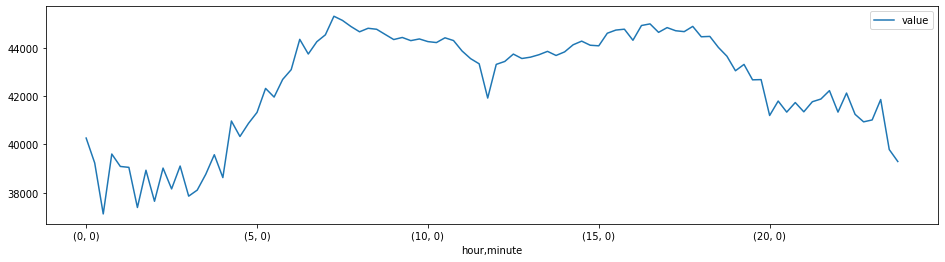

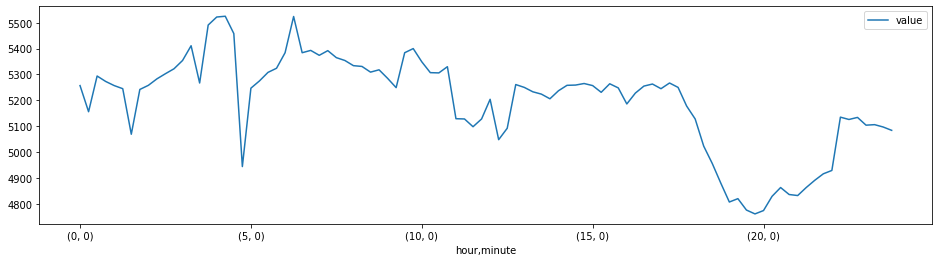

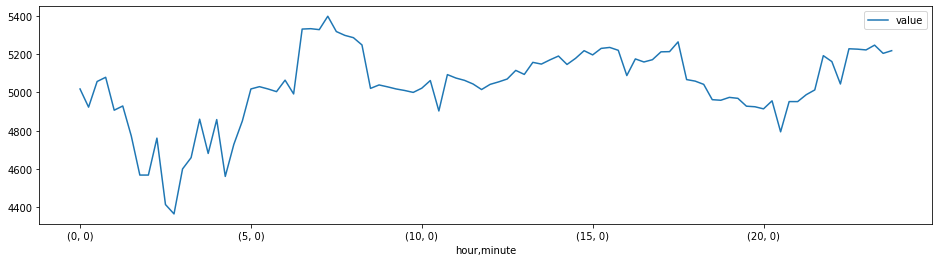

In [24]:
train_fea.groupby(['hour','minute'])[['value']].sum().plot(figsize=(16,4))
val_fea.groupby(['hour','minute'])[['value']].sum().plot(figsize=(16,4))
test_fea.groupby(['hour','minute'])[['value']].sum().plot(figsize=(16,4))
plt.show()

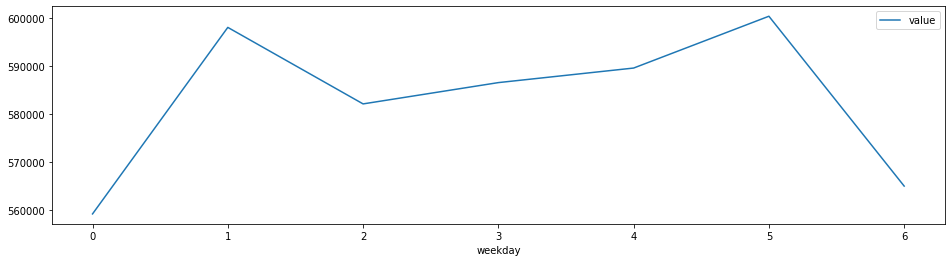

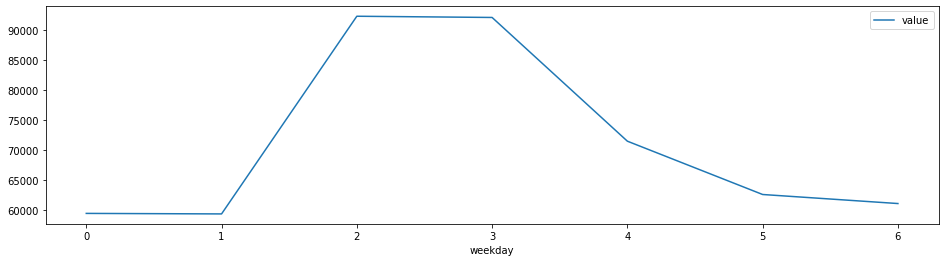

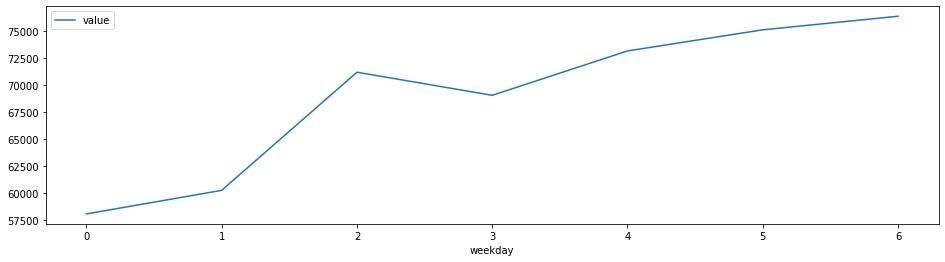

In [25]:
train_fea.groupby(['weekday'])[['value']].sum().plot(figsize=(16,4))
val_fea.groupby(['weekday'])[['value']].sum().plot(figsize=(16,4))
test_fea.groupby(['weekday'])[['value']].sum().plot(figsize=(16,4))
plt.show()

## Create other features (lagged features, moving averages, etc.)
features = data_filled.groupby(["s_id"]).apply(
    lambda x: combine_features(x, ["value"], lags, window_size, used_columns)
)

In [26]:
def lagged_features(df, lags):
    """Create lagged features based on time series data.
    
    Args:
        df (Dataframe): Input time series data sorted by time
        lags (List): Lag lengths
        
    Returns:
        fea (Dataframe): Lagged features 
    """
    df_list = []
    for lag in lags:
        df_shifted = df.shift(lag)
        df_shifted.columns = [x + "_lag" + str(lag) for x in df_shifted.columns]
        df_list.append(df_shifted)
    df_fea = pd.concat(df_list, axis=1)
    return df_fea

In [27]:
def moving_averages(df, start_step, window_size=None):
    """Compute averages of every feature over moving time windows.
    
    Args:
        df (Dataframe): Input features as a dataframe
        start_step (Integer): Starting time step of rolling mean
        window_size (Integer): Windows size of rolling mean
    
    Returns:
        fea (Dataframe): Dataframe consisting of the moving averages
    """
    if window_size is None:
        # Use a large window to compute average over all historical data
        window_size = df.shape[0]
    df_fea = df.shift(start_step).rolling(min_periods=1, center=False, window=window_size).mean()
    df_fea.columns = df_fea.columns + "_mean"
    return df_fea

In [28]:
def combine_features(df, lag_fea, lags, window_size, used_columns):
    """Combine lag features, moving average features, and orignal features in the data.
    
    Args:
        df (Dataframe): Time series data including the target series and external features
        lag_fea (List): A list of column names for creating lagged features
        lags (Numpy Array): Numpy array including all the lags
        window_size (Integer): Window size of rolling mean
        used_columns (List): A list containing the names of columns that are needed in the 
        input dataframe (including the target column)
    
    Returns:
        fea_all (Dataframe): Dataframe including all the features
    """
    lagged_fea = lagged_features(df[lag_fea], lags)
    moving_avg = moving_averages(df[lag_fea], 2, window_size)
    fea_all = pd.concat([df[used_columns], lagged_fea, moving_avg], axis=1)
    return fea_all

# Model

In [29]:
# Create training set
lgb_train = lgb.Dataset(train_fea.drop(["value"], axis=1, inplace=False), label=train_fea["value"])
lgb_val = lgb.Dataset(val_fea.drop(["value"], axis=1, inplace=False), label=val_fea["value"])

In [30]:
# Parameters of LightGBM model
params = {
    "objective": "mape",
    "num_leaves": 124,
    "min_data_in_leaf": 340,
    "learning_rate": 0.1,
    "feature_fraction": 0.65,
    "bagging_fraction": 0.87,
    "bagging_freq": 19,
    "num_rounds": 500,
    "early_stopping_rounds": 125,
    "num_threads": 16,
    "seed": 1,
}

In [31]:
# Define categorical features
categ_fea = ["s_id"]

In [32]:
# Train LightGBM model
print("Training LightGBM model...")
bst = lgb.train(params=params, train_set=lgb_train, valid_sets=[lgb_val],
                categorical_feature=categ_fea, verbose_eval=5)
print("")

Training LightGBM model...


/Users/nhuyghe/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/nhuyghe/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/nhuyghe/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['s_id']
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] Met 'abs(label) < 1', will convert them to '1' in MAPE objective and metric
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.194601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 2273635, number of used features: 12


/Users/nhuyghe/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/nhuyghe/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 1.000000
Training until validation scores don't improve for 125 rounds
[5]	valid_0's mape: 0.551459
[10]	valid_0's mape: 0.489831
[15]	valid_0's mape: 0.463071
[20]	valid_0's mape: 0.44786
[25]	valid_0's mape: 0.437744
[30]	valid_0's mape: 0.430322
[35]	valid_0's mape: 0.425829
[40]	valid_0's mape: 0.423974
[45]	valid_0's mape: 0.422713
[50]	valid_0's mape: 0.422617
[55]	valid_0's mape: 0.42168
[60]	valid_0's mape: 0.421522
[65]	valid_0's mape: 0.421382
[70]	valid_0's mape: 0.421267
[75]	valid_0's mape: 0.420894
[80]	valid_0's mape: 0.420569
[85]	valid_0's mape: 0.42024
[90]	valid_0's mape: 0.419982
[95]	valid_0's mape: 0.419527
[100]	valid_0's mape: 0.419559
[105]	valid_0's mape: 0.419432
[110]	valid_0's mape: 0.419418
[115]	valid_0's mape: 0.419363
[120]	valid_0's mape: 0.419088
[125]	valid_0's mape: 0.41865
[130]	valid_0's mape: 0.418065
[135]	valid_0's mape: 0.417872
[140]	valid_0's mape: 0.417476
[145]	valid_0's mape: 0.417436
[150]	vali

In [33]:
def predict(df, model, target_col, idx_cols, integer_output=True):
    """Predict target variable with a trained LightGBM model.
    
    Args: 
        df (pandas.DataFrame): Dataframe including all needed features
        model (lightgbm.Booster): Trained LightGBM booster model
        target_col (str): Name of the target column
        idx_col (list[str]): List of the names of the index columns, e.g. ["store", "brand", "week"]
        integer_output (bool): It it is True, the forecast will be rounded to an integer 
    
    Returns:
        pandas.DataFrame including the predictions of the target variable 
    """  
    if target_col in df.columns:
        df = df.drop(target_col, axis=1)
    predictions = pd.DataFrame({target_col: model.predict(df)})
    
    if integer_output:
        predictions[target_col] = predictions[target_col].apply(lambda x: round(x))
    
    return pd.concat([df[idx_cols].reset_index(drop=True), predictions], axis=1)

In [34]:
# Generate forecasts
idx_cols = ['s_id','year','month','day','hour','minute']
pred = predict(test_fea, model = bst, target_col="value", idx_cols=idx_cols, integer_output=True)\
        .sort_values(by=idx_cols)\
        .reset_index(drop=True)

print("Prediction results:")
pred

Prediction results:


,s_id,year,month,day,hour,minute,value
0,1,2020,10,2,4,45,2
1,1,2020,10,2,5,0,2
2,1,2020,10,2,5,15,2
3,1,2020,10,2,5,30,2
4,1,2020,10,2,5,45,2
...,...,...,...,...,...,...,...
284279,99,2020,11,8,22,45,2
284280,99,2020,11,8,23,0,2
284281,99,2020,11,8,23,15,2
284282,99,2020,11,8,23,30,2


# Evaluation

In [35]:
idx_cols

['s_id', 'year', 'month', 'day', 'hour', 'minute']

In [36]:
df_pred_vs_actual = pd.merge(pred, test_fea[idx_cols+['value']], on=idx_cols, how="left")\
                    .rename(columns={'value_x':'value_pred','value_y':'value_actual'})

In [37]:
df_pred_vs_actual['timestamp'] = pd.to_datetime(df_pred_vs_actual[['year', 'month', 'day', 'hour', 'minute']])
df_pred_vs_actual['value_diff'] = df_pred_vs_actual['value_pred'] - df_pred_vs_actual['value_actual']
df_pred_vs_actual['abs_diff'] = np.abs(df_pred_vs_actual['value_pred'] - df_pred_vs_actual['value_actual'])
df_pred_vs_actual = df_pred_vs_actual[['timestamp','s_id','value_pred','value_actual','value_diff','abs_diff']]

In [38]:
df_pred_vs_actual.describe()

,s_id,value_pred,value_actual,value_diff,abs_diff
count,284284.000000,284284.000000,284284.000000,284284.000000,284284.000000
mean,49.340659,1.569895,1.699572,-0.129677,0.869043
std,29.339752,0.916159,1.222652,1.187347,0.819373
min,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,23.000000,1.000000,0.000000,-1.000000,0.000000
50%,49.000000,2.000000,2.000000,0.000000,1.000000
75%,76.000000,2.000000,3.000000,1.000000,1.000000
max,99.000000,3.000000,3.000000,3.000000,3.000000


# Visualisation

## Feature importance

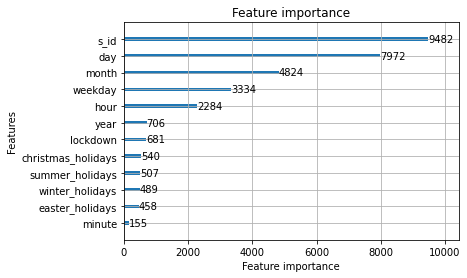

In [39]:
# Plot feature importances
ax = lgb.plot_importance(bst, max_num_features=20)
plt.show()

## Predictions vs actuals

In [40]:
df_pred_vs_actual.head()

,timestamp,s_id,value_pred,value_actual,value_diff,abs_diff
0,2020-10-02 04:45:00,1,2,3,-1,1
1,2020-10-02 05:00:00,1,2,3,-1,1
2,2020-10-02 05:15:00,1,2,3,-1,1
3,2020-10-02 05:30:00,1,2,2,0,0
4,2020-10-02 05:45:00,1,2,2,0,0


### All stations

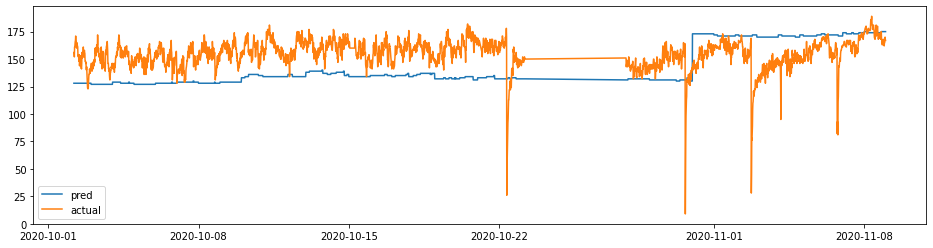

In [41]:
y_pred = df_pred_vs_actual.groupby('timestamp')['value_pred'].sum()
y_actual = df_pred_vs_actual.groupby('timestamp')['value_actual'].sum()
x = df_pred_vs_actual['timestamp'].unique()

plt.figure(figsize=(16,4))
plt.plot(x, y_pred, label='pred')
plt.plot(x, y_actual, label='actual')
plt.legend()
plt.show()

### By station

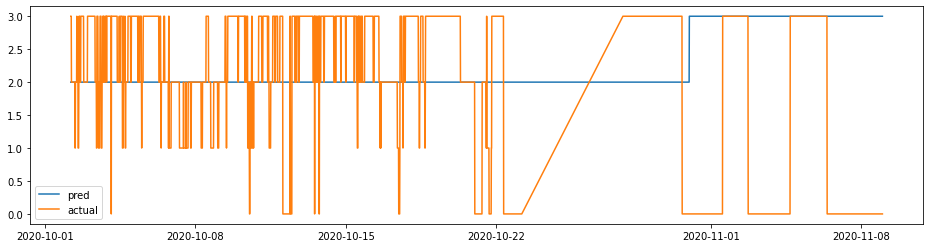

In [42]:
s_id = 1

df_tmp = df_pred_vs_actual[df_pred_vs_actual['s_id'] == s_id]
y_pred_id = df_tmp['value_pred']
y_actual_id = df_tmp['value_actual']
x = df_tmp['timestamp'].unique()

plt.figure(figsize=(16,4))
plt.plot(x, y_pred_id, label='pred')
plt.plot(x, y_actual_id, label='actual')
plt.legend()
plt.show()